# Rendu P1 Guillaume TRICHARD
## Analyse des données du titanic

J'importe les différentes librairies qui vont me servir par la suite pour annalyser le dataFrame train.

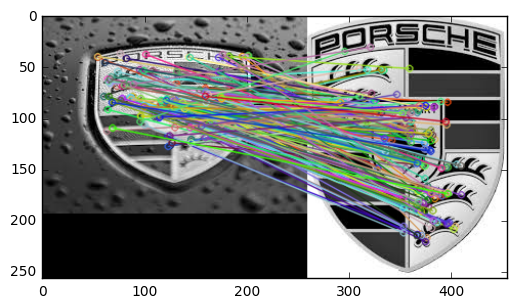

5


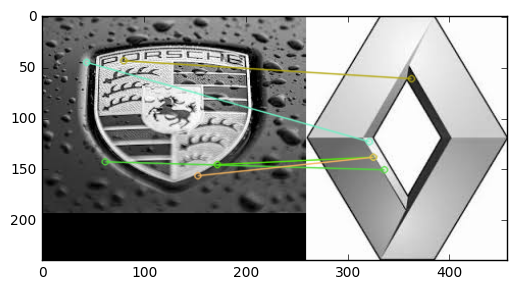

20


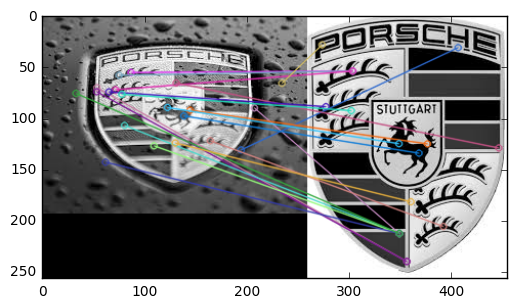

(<matplotlib.image.AxesImage at 0x143446b0>, None)

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread('1.png',0)          # queryImage
img2 = cv2.imread('2.png',0) # trainImage
img3 = cv2.imread('3.png',0)
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)




# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
#cv2.drawMatches()
img4 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:500],None, flags=2)
plt.imshow(img4),plt.show()

sift = cv2.xfeatures2d.SIFT_create()


# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
kp3, des3 = sift.detectAndCompute(img3,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des3, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img4 = cv2.drawMatchesKnn(img1,kp1,img3,kp3,good, None,flags=2)

print len(good)
plt.imshow(img4),plt.show()


# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img4 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None,flags=2)
print len(good)
plt.imshow(img4),plt.show()



[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0],

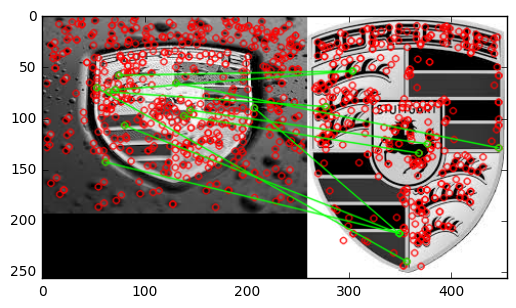

(<matplotlib.image.AxesImage at 0x12758e90>, None)

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img1 = cv2.imread('1.png',0)          # queryImage
img2 = cv2.imread('2.png',0) # trainImage
# Initiate SIFT detector

sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in xrange(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

In [22]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv2.imread('1.png',0)          # queryImage
img2 = cv2.imread('2.png',0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
        
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print "Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT)
    matchesMask = None
    
    
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

AttributeError: 'module' object has no attribute 'SIFT'

### Je récupére des données depuis le fichier CSV "train.csv"

Une fois que le fichier qui contien le DataFrame est localisé, je rentre toutes les données dans Panda afin de traiter celles-ci plus facilement.

In [2]:
#df = le data frame
df = pd.read_csv('train.csv', header=0)
print df

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

### Ajout de la colonne Gender et de la colonne AgeFill pour mieux utiliser les données par la suite

Afin de plus facilement analyser les données il est nécessaire de réaliser un travail préparatoir sur celles-ci. En effet il est possible que les données soient perfectibles : 
    * Présence de nan dans certaines colonnes 
    * Majuscules pas toujours présentes
    * Présence de 0
    * Des données de type string qui devrait être en int 
    
C'est pour cela que je réalise un petit tréitement afin de me faciliter la vie 

In [3]:
# Ajouter une colonne :
df['Gender'] = 4

# Peut-être avec des valeurs plus intéressantes :
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )

# Ou binaire :
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & \
                              (df['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

# On commence avec une copie :
df['AgeFill'] = df['Age']

df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

# Et puis on le rempli :
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & 
                (df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


### Etude pérmetant de voir les chances de survie des passagers en fonction de l'age de ceux-ci

Il est intéressant de connaitre les différents pourcentages de survie des passagers en fonction de l'âge de ceux-ci
- Suite à cette étude on remarque que les passagers ayants entre 0 et 10 ans ont plus survécu que les autres. 
- En revanche on remarque ques les personnes agées ont peut survécu au drame
- Pour le reste de la population les chances de survies sont relativement similaires 


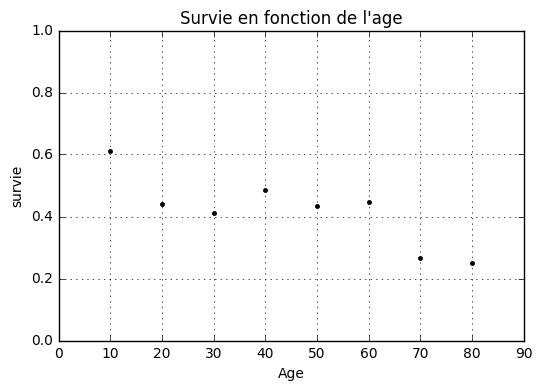

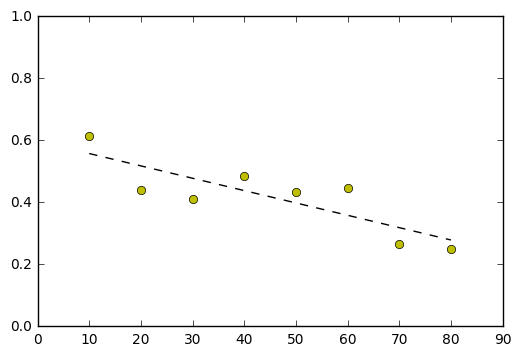

In [4]:
survie = []
age = []
#permet de sortir le pourcentage de survie en fonction de l'age des passagers du bateau
for i in range(1,9):
    survie.append(len(df[ (df['Survived'] == 1) & (df['Age'] <= i*10) & (df['Age'] > (i-1)*10) ]) / len(df[(df['Age'] < i*10) & (df['Age'] > (i-1)*10) ]))
    age.append(i*10)
    

#Premier graphique 
plt.figure()
plt.title('Survie en fonction de l\'age')
plt.xlabel('Age')
plt.ylabel('survie')
plt.plot(age, survie, 'k.')
plt.axis([0, 90, 0, 1])
plt.grid(True)
plt.show()
    

    
    
#graphique de régression linéaire 
fit = np.polyfit(age,survie,1)
fit_fn = np.poly1d(fit) 
plt.plot(age,survie, 'yo', age, fit_fn(age), '--k')
plt.xlim(0, 90)
plt.ylim(0, 1)
plt.show()
    
    
    

### Analyse pour observer les chances de survie des passagers si le numéro 13 est présent dans l'age, le numéro de ticket, le numéro de passager ou le prix du billet

En plus des analyses purement basé sur des caractéristiques tangibles il est aussi possible d'annalyser les données sous un aspect plus supersticieux. 
- Dans l'exemple suivant je vérifie si les passagers du titanic qui possèdent des données contenant un "13" ont plus de chance que survivre au naufrage que les autres. 
- Suite aux résultats de l'annalyse on remarque que les pourcentages sont assez silimaires 


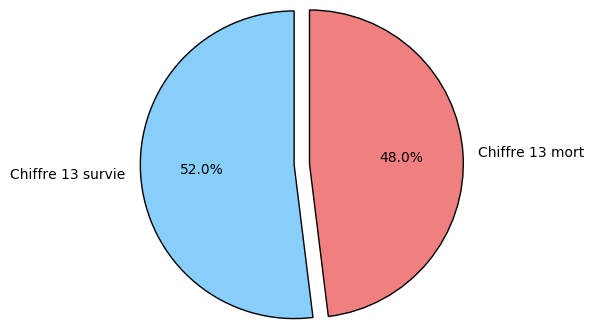

[1, 7, 32, 14, 13, 8, 4]
[7, 9, 19, 26, 9, 7, 3]


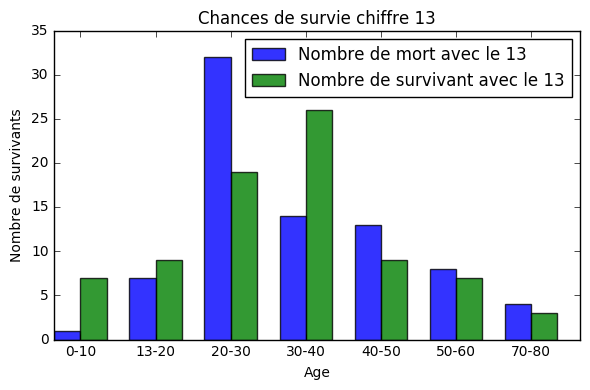

In [5]:
survie = []
survie.append(df[df['PassengerId'].astype(str).str.contains("13")] | df[df['AgeFill'].astype(str).str.contains("13")] | df[df['Ticket'].astype(str).str.contains("13")] | df[df['Fare'].astype(str).str.contains("13")])

#permet de connaitre les chances de survivre si un 13 était présent dans (l'age ou le numéro de ticket ou lid passager ou le prix)
total13 =  len(df[(df['PassengerId'].astype(str).str.contains("13") | df['Age'].astype(str).str.contains("13") | df['Ticket'].astype(str).str.contains("13") | df['Fare'].astype(str).str.contains("13"))])
survie13 = len(df[(df['PassengerId'].astype(str).str.contains("13") | df['Age'].astype(str).str.contains("13") | df['Ticket'].astype(str).str.contains("13") | df['Fare'].astype(str).str.contains("13")) & (df['Survived'] == 1 )])
mort13 = len(df[(df['PassengerId'].astype(str).str.contains("13") | df['Age'].astype(str).str.contains("13") | df['Ticket'].astype(str).str.contains("13") | df['Fare'].astype(str).str.contains("13")) & (df['Survived'] == 0 )])


labels = 'Chiffre 13 survie', 'Chiffre 13 mort'
sizes = [mort13 / total13*100, 100 - (mort13 / total13 *100)]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()

from matplotlib import pyplot


total13 =  df[(df['PassengerId'].astype(str).str.contains("13") | df['Age'].astype(str).str.contains("13") | df['Ticket'].astype(str).str.contains("13") | df['Fare'].astype(str).str.contains("13"))]
survie13 = df[(df['PassengerId'].astype(str).str.contains("13") | df['Age'].astype(str).str.contains("13") | df['Ticket'].astype(str).str.contains("13") | df['Fare'].astype(str).str.contains("13")) & (df['Survived'] == 1 )]
mort13 = df[(df['PassengerId'].astype(str).str.contains("13") | df['Age'].astype(str).str.contains("13") | df['Ticket'].astype(str).str.contains("13") | df['Fare'].astype(str).str.contains("13")) & (df['Survived'] == 0 )]

survie = []
mort = []

for i in range(1,8):
    survie.append(len(df[(df['PassengerId'].astype(str).str.contains("13") | df['Age'].astype(str).str.contains("13") | df['Ticket'].astype(str).str.contains("13") | df['Fare'].astype(str).str.contains("13")) & (df['Survived'] == 1 ) & (df['Age'] <= i*10) & (df['Age'] > (i-1)*10)]))
    mort.append(len(df[(df['PassengerId'].astype(str).str.contains("13") | df['Age'].astype(str).str.contains("13") | df['Ticket'].astype(str).str.contains("13") | df['Fare'].astype(str).str.contains("13")) & (df['Survived'] == 0 ) & (df['Age'] <= i*10) & (df['Age'] > (i-1)*10)]))
    
    
print mort
print survie 

n_groups = 7
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, mort, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Nombre de mort avec le 13')
 
rects2 = plt.bar(index + bar_width, survie, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Nombre de survivant avec le 13')
 
plt.xlabel('Age')
plt.ylabel('Nombre de survivants')
plt.title('Chances de survie chiffre 13')
plt.xticks(index + bar_width, ('0-10', '13-20', '20-30', '30-40', '40-50', '50-60', '70-80'))
plt.legend()

plt.tight_layout()
plt.show()



### Je determine les chances de survie en fonction du prix du billet payé par les passagers 

Il est question dans cette analyse de savoir si il y a une relation entre le prix du billet et les chances de survie des passagers.
- suite a cette analyse on remarque que les chances de survie sont relativement bien dispersé mais il y a cependant quelques données qui sortent du lot : 
       * les passagers qui ont payé leurs billet entre 0 et 10 unité ont peu survécu au naufrage 
       * les passagers qui ont payé leurs billet entre 50 et 60 unité et 70 et 80 unité on mieux survécu au naufrage 

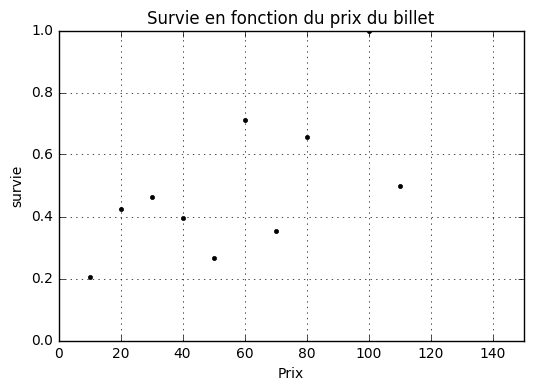

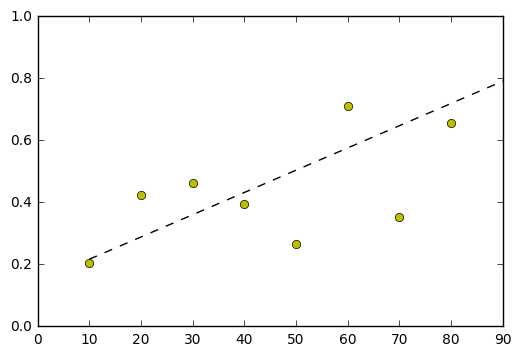

In [6]:
survie2 = []
prix = []
#permet de sortir le pourcentage de survie en fonction de l'age des passagers du bateau
for i in range(1,13):
    survie2.append(len(df[ (df['Survived'] == 1) & (df['Fare'] <= i*10) & (df['Fare'] > (i-1)*10) ]) / len(df[(df['Fare'] < i*10) & (df['Fare'] > (i-1)*10) ]))    
    prix.append(i*10)


plt.figure()
plt.title('Survie en fonction du prix du billet')
plt.xlabel('Prix')
plt.ylabel('survie')
plt.plot(prix, survie2, 'k.')
plt.axis([0, 150, 0, 1])
plt.grid(True)
plt.show()



#graphique de régression linéaire 
fit = np.polyfit(prix,survie2,1)
fit_fn = np.poly1d(fit) 
plt.plot(prix,survie2, 'yo', prix, fit_fn(prix), '--k')
plt.xlim(0, 90)
plt.ylim(0, 1)
plt.show()
    
    


### Permet de déterminer les chances de survies en fonction du port d'embarcation des passagers 
#### C = Cherbourg
#### S = Southampton
#### Q = Queenstown

Dans cette analyse il est question de savoir si le port d'embarcation des passagers infue sur leurs chance de survie.
- La lecture de ce résultat nous montre clairement que les passagers ayant embarqué a Cherbourg ont beaucoup mieux survécu au naufrage

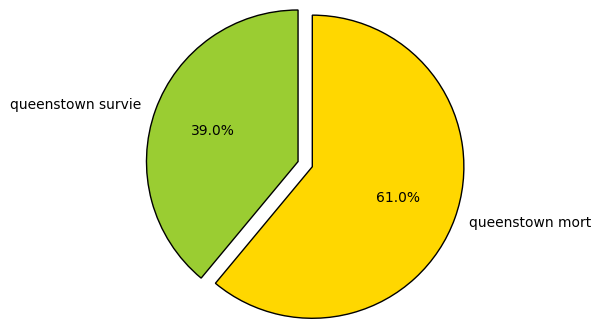

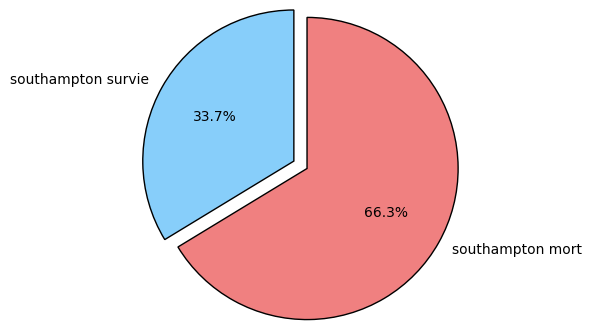

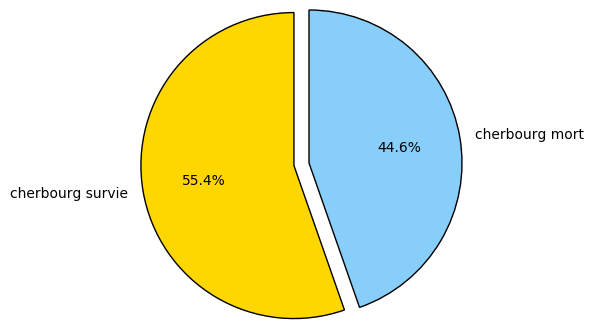

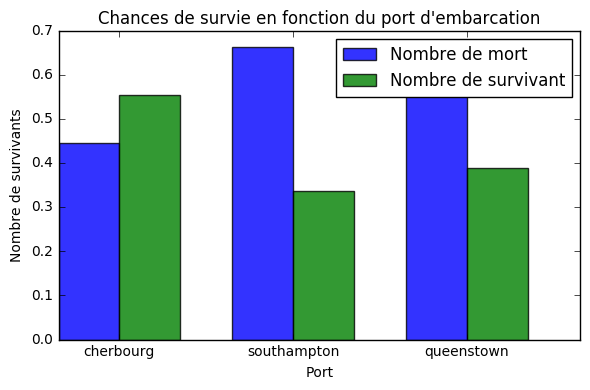

In [97]:
cherbourgSurvive = len(df[ (df['Embarked'] == "C") & (df['Survived'] == 1) ][['Gender','Embarked','Fare','Survived']])
cherbourg = len(df[ df['Embarked'] == "C" ][['Gender','Embarked','Fare','Survived']])
cherbourgRatio = cherbourgSurvive / cherbourg #calcul du pourcentage de passager ayant survécu quand ils ont embarqué a cherbourg

southamptonSurvive = len(df[ (df['Embarked'] == "S") & (df['Survived'] == 1) ][['Gender','Embarked','Fare','Survived']])
southampton = len(df[ df['Embarked'] == "S" ][['Gender','Embarked','Fare','Survived']])
southamptonRatio = southamptonSurvive / southampton #calcul du pourcentage de passager ayant survécu quand ils ont embarqué a southampton

queenstownSurvive = len(df[ (df['Embarked'] == "Q") & (df['Survived'] == 1) ][['Gender','Embarked','Fare','Survived']])
queenstown = len(df[ df['Embarked'] == "Q" ][['Gender','Embarked','Fare','Survived']])
queenstownRatio = queenstownSurvive / queenstown #calcul du pourcentage de passager ayant survécu quand ils ont embarqué a queenstown


#premier graphique
labels = 'queenstown survie', 'queenstown mort'
sizes = [queenstownRatio*100, 100-queenstownRatio*100]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()

#deuxième graphique
labels = 'southampton survie', 'southampton mort'
sizes = [southamptonRatio*100, 100-southamptonRatio*100]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()

#troisième graphique
labels = 'cherbourg survie', 'cherbourg mort'
sizes = [cherbourgRatio*100, 100-cherbourgRatio*100]
colors = ['gold', 'lightskyblue']
explode = (0, 0.1)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)

plt.axis('equal')
plt.show()






survie = [cherbourgRatio, southamptonRatio, queenstownRatio]
mort = [1-cherbourgRatio, 1-southamptonRatio, 1-queenstownRatio]


# graph a bar en fonction du port d'embarcation 
n_groups = 3
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, mort, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Nombre de mort')
 
rects2 = plt.bar(index + bar_width, survie, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Nombre de survivant')
 
plt.xlabel('Port')
plt.ylabel('Nombre de survivants')
plt.title('Chances de survie en fonction du port d\'embarcation')
plt.xticks(index + bar_width, ('cherbourg', 'southampton', 'queenstown'))
plt.legend()

plt.tight_layout()
plt.show()






Pour expliquer le fait que les passagers ayant embarqué à Cherbourg ont mieux survécu on peut émettre l'hypothèse que comme Cherbourg est le seul port situé en france, les français ont un instinct de survie plus important ou alors qu'ils savent mieux nager. 

Bon nous allons tenter de trouver une explication un petit peu plus cartésienne 


En y regardant de plus près on remarque que les passagers qui ont embarqué au port de Cherbourg qui ont survécu ont payé leur billet plus cher que les passagers ayant embarqué au port de Cherbourg sans survivre au naufrage.

In [8]:
print df[ (df['Survived'] == 1) & (df['Embarked'] == "C") ]['Fare'].mean()#les passagers qui ont embarqué a cerbourg en france qui ont survécu on payé leur billets beaucoup plus cher
print df[ (df['Survived'] == 0) & (df['Embarked'] == "C") ]['Fare'].mean()

79.7209258065
35.4433346667


On constate en effet que le prix moyen des billets des passagers ayant suvécu et embarqué à Cherbourg est de 80 alors que le prix moyen des passagers ayant péri et embarqué à Cherbourg est de 35. Un passager ayant embarqué à Cherbourg et qui a payé son billet assez cher a donc plus de chances de survivre. 

Nous allons maintenant comparer le prix moyen des billets des passagers de Cherbourg avec les autres : 

In [9]:
print df[ (df['Embarked'] == "C") ]['Fare'].mean()#les billets des passagers embarqué a cherbourg sont plus cher
print df['Fare'].mean()

59.9541440476
32.2042079686


En moyenne les passagers de Cherbourg ont payé leur billet plus cher.
Nous allons maintenant voir si il y a d'autres facteurs qui influent sur la survie des passagers
    - Prix du billet
    - genre

In [10]:
#Calcul des chances de survie des passagers en fonction du port d'embarcation et du prix (>50)
cherbourgSurvivePrix = len(df[ (df['Embarked'] == "C") & (df['Survived'] == 1) & (df['Fare'] > 50) ][['Gender','Embarked','Fare','Survived']])
cherbourgPrix = len(df[ (df['Embarked'] == "C") & (df['Fare'] > 50) ][['Gender','Embarked','Fare','Survived']])
cherbourgRatioPrix = cherbourgSurvivePrix / cherbourgPrix


#Calcul des chances de survie des passagers en fonction du port d'embarcation, du prix (>50) et du genre (0)
cherbourgSurviveGenre = len(df[ (df['Embarked'] == "C") & (df['Survived'] == 1) & (df['Fare'] > 30) & (df['Gender'] == 0) ][['Gender','Embarked','Fare','Survived']])
cherbourgGenre = len(df[ (df['Embarked'] == "C") & (df['Fare'] > 30) & (df['Gender'] == 0)][['Gender','Embarked','Fare','Survived']])
cherbourgRatioGenre = cherbourgSurviveGenre / cherbourgGenre

#afin de vérifier les résultats je sort la liste des personnes concerné et en effet les données sembles correctes
test = df[ (df['Embarked'] == "C") & (df['Survived'] == 1) & (df['Fare'] > 30) & (df['Gender'] == 0) ][['Gender','Embarked','Fare','Survived']]

print cherbourgRatioPrix
print cherbourgRatioGenre

#je charge les données dans un tableau pour les afficher plus tard
graphData = [cherbourgRatioPrix,cherbourgRatio, cherbourgRatioGenre]



0.786885245902
1.0


On remarque suite à notre analyse que les passagers ayant embarqué au port de Cherbourg qui ont payé leur billet plus de 50 ont 79% de chance de survivre. Nous avons donc trouvé une variable qui précise nos résultas.

Si on va encore plus loin en ajoutant la variable de genre nos résultas se présisent encore plus ! 
En effet les passagers hommes qui ont embarqué au port de Cherbourg ayant payé leur billet plus de 30 ont 100% de chance de survie !

Représentons maintenant les résultats sous forme de graphique : 

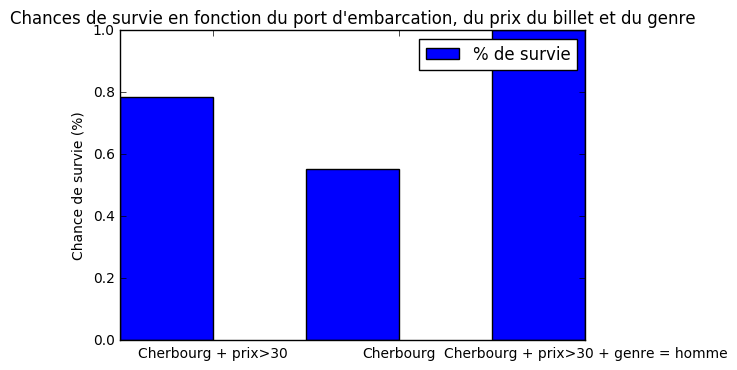

In [98]:
n_groups = 3
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 1
 
rects1 = plt.bar(index, graphData, bar_width,
                 alpha=opacity,
                 color='b',
                 label='% de survie')
 
plt.ylabel('Chance de survie (%)')
plt.title('Chances de survie en fonction du port d\'embarcation, du prix du billet et du genre')
plt.xticks(index + bar_width, ('Cherbourg + prix>30', 'Cherbourg', 'Cherbourg + prix>30 + genre = homme'))
plt.legend()

plt.show()

On remarque donc facilement que l'ajout de variable dans notre analyse permet de trouver un taux de survie très élevé. Plus la requête est précise et ciblé plus notre résultat est pertinent 

### Analyse de la survie en fonction de la classe 


Survie de passagers en fonction de leur classe d'embarcation 

In [99]:
print(df.groupby('Pclass').mean())

        PassengerId  Survived        Age     SibSp     Parch       Fare  \
Pclass                                                                    
1        461.597222  0.629630  36.812130  0.416667  0.356481  84.154687   
2        445.956522  0.472826  29.765380  0.402174  0.380435  20.662183   
3        439.154786  0.242363  25.932627  0.615071  0.393075  13.675550   

          Gender    AgeFill  
Pclass                       
1       0.564815  38.270463  
2       0.586957  29.863207  
3       0.706721  24.802281  


On remarque que les passagers présents en première classe ont beaucoup mieux survécu que les passagers présents dans les autres classes.

### Analyse de la survie en fonction de la classe et du genre

               PassengerId  Survived        Age     SibSp     Parch  \
Pclass Gender                                                         
1      0        469.212766  0.968085  33.978723  0.553191  0.457447   
       1        455.729508  0.368852  38.995246  0.311475  0.278689   
2      0        443.105263  0.921053  28.703947  0.486842  0.605263   
       1        447.962963  0.157407  30.512315  0.342593  0.222222   
3      0        399.729167  0.500000  23.572917  0.895833  0.798611   
       1        455.515850  0.135447  26.911873  0.498559  0.224784   

                     Fare    AgeFill  
Pclass Gender                         
1      0       106.125798  34.648936  
       1        67.226127  41.060820  
2      0        21.970121  28.703947  
       1        19.741782  30.678981  
3      0        16.118810  21.677083  
       1        12.661633  26.099193  


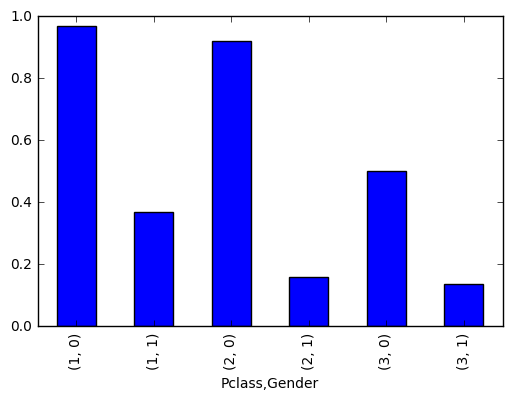

In [112]:
class_sex_grouping = df.groupby(['Pclass','Gender']).mean()#j'utilise group by pour rassembler les données de la classe et du sex
print(class_sex_grouping)

class_sex_grouping['Survived'].plot.bar()

On remarque que en analysant les données de classe et de genre on remarque que les femmes présentes en première classe et seconde classe ont beaucoup mieux survécu au naufrage que les autres passagers. 

On peut expliquer cela par le fait que les femmes et enfants ont eu des places prioritaires sur les canots de sauvetage.

### Création d'un arbre pour prédire la survie des passagers

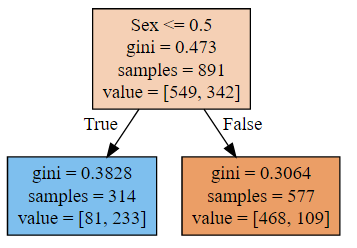

In [100]:
encoded_sex = label_encoder.fit_transform(df["Sex"])
#ajout de l'arbre de décision 
tree_model = tree.DecisionTreeClassifier()

tree_model.fit(X = pd.DataFrame(encoded_sex), y = df["Survived"])
#génération du .dot pour arriver a une image
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(tree_model, feature_names=["Sex"], out_file=f)
#j'affiche l'image généré 
from IPython.display import Image
Image(filename='tree1.png')

Suite a la génération de notre arbre on peut lire plusieurs informations : 
- Samples : nombre de personnes analysées 
- value : nombre de personnes vivantes / nombre de personnes mortes
- gini : proportion de personnes mortes et vivantes

On remarque dans notre premier arbre que les femmes ont beaucoup mieux survécu au naufrage que les hommes. 


Nous allons maintenant complèter notre arbre avec la classe des passagers.

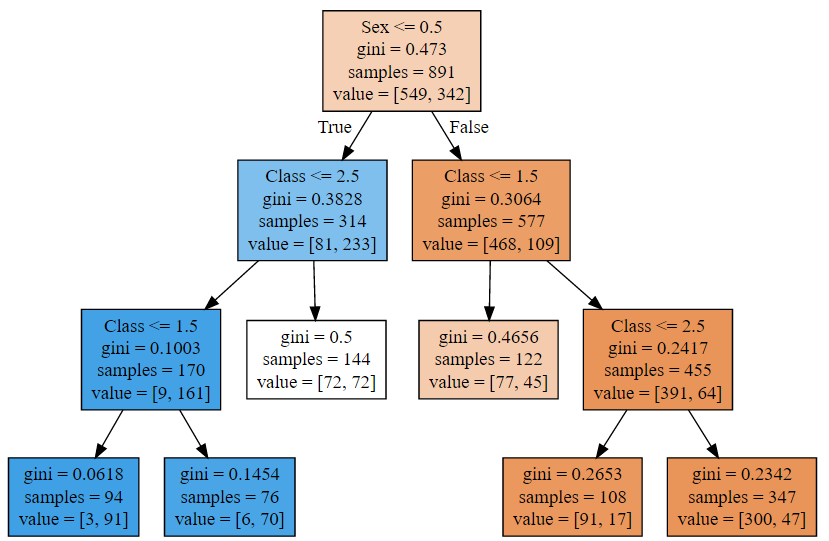

In [101]:
#Je change les paramètres afin de modifier l'arbre
predictors = pd.DataFrame([encoded_sex, df["Pclass"]]).T

tree_model.fit(X = predictors, y = df["Survived"])

#génération du .dot pour arriver a une image
with open("tree2.dot", 'w') as f:
     f = tree.export_graphviz(tree_model, feature_names=["Sex", "Class"], out_file=f, filled="true")

from IPython.display import Image
Image(filename='tree2.png')

A la lecture de l'arbre on remarque que les femmes en première et deuxième classe ont beaucoup mieux survécu que les autres ce qui confirme notre graph vu plus haut. Voyons maintenant la précision de notre arbre :  

In [102]:
tree_model.score(X = predictors, y = df["Survived"])

0.78675645342312006

Presque 80% ! C'est un super score ! 
Nous allons continuer apréciser l'arbre afin de faire augmenter cette précision. Pour cela nous rajoutons le nombre de frères, soeures, époux / épouse.

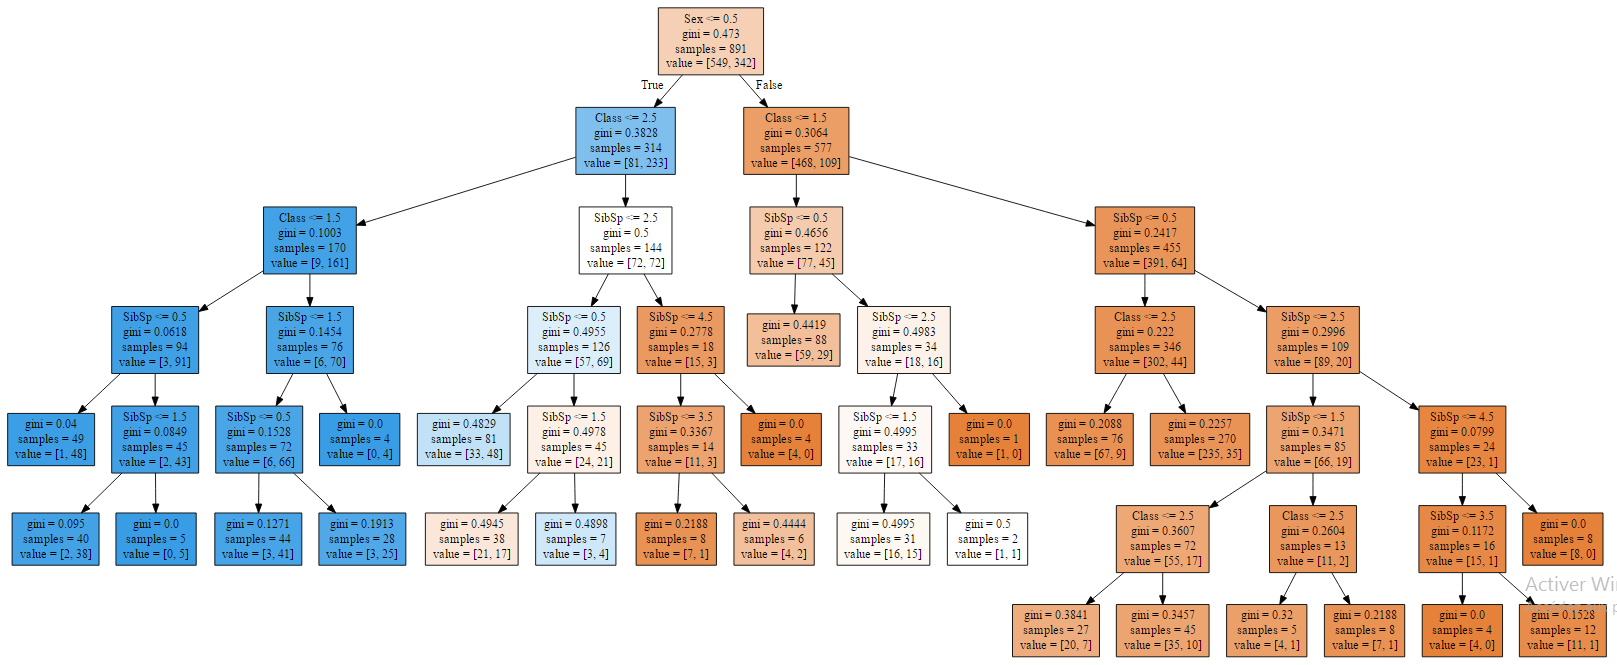

In [113]:
#Je change les paramètres afin de modifier l'arbre
predictors = pd.DataFrame([encoded_sex, df["Pclass"], df["SibSp"]]).T

tree_model.fit(X = predictors, y = df["Survived"])#je compare les données avec le survie des passagers 

with open("tree3.dot", 'w') as f:
     f = tree.export_graphviz(tree_model, feature_names=["Sex", "Class","SibSp"], out_file=f, filled="true")
#j'affiche l'arbre 
Image(filename='tree3.png')

On remarque que l'arbre se complexifie grandement et devient compliqué a analyser. 
Cependant en regardant les couleurs on remarque que SibSp n'a pas une grande influence sur les résultats de l'arbre.
Regardons maintenant si la précision a augmenté avec cette nouvelle donnée.


In [105]:
tree_model.score(X = predictors, y = df["Survived"])

0.80471380471380471

A peine plus de 80%...
Cela confirme le fait que SibSp ne possède pas une grande influence sur la survie ou non des passagers.
Pour finir notre arbre nous allons ajouter plusieurs autres valeurs afin de préciser un maximum notre arbre. 

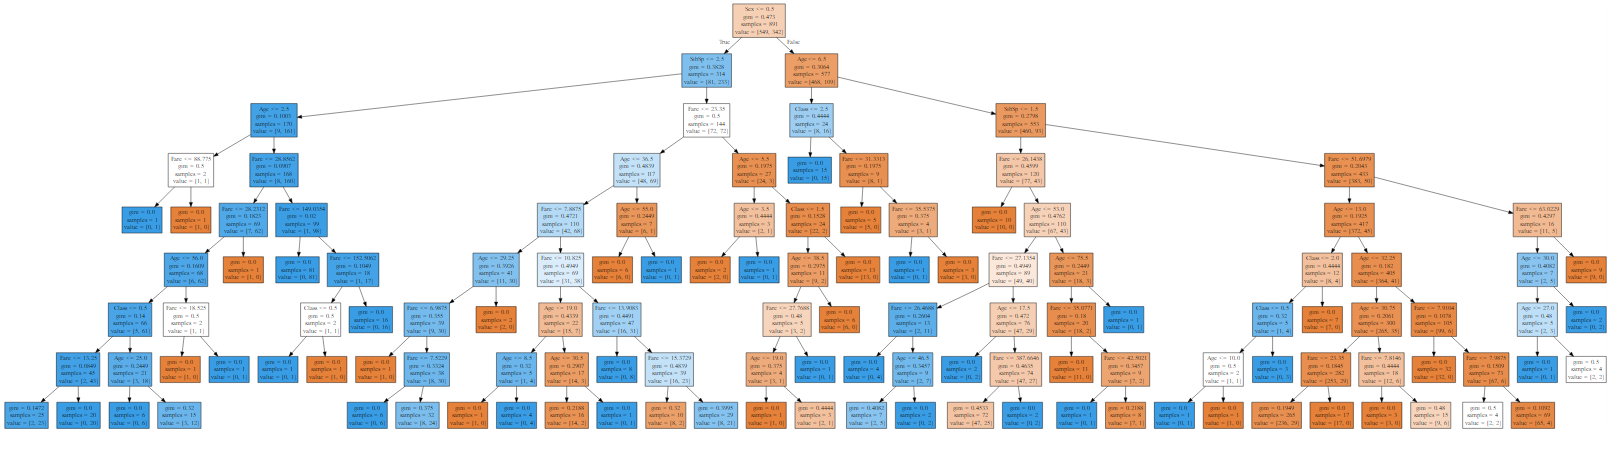

In [114]:
predictors = pd.DataFrame([encoded_sex, df["Pclass"], df["SibSp"], df["Fare"], df["Age"]]).T
#le limite a 8 afin de na pas avoir un arbre vraiment trop grand
tree_model = tree.DecisionTreeClassifier(max_depth = 8)

tree_model.fit(X = predictors, y = df["Survived"])#je compare les données avec le survie des passagers 

with open("tree4.dot", 'w') as f:
     f = tree.export_graphviz(tree_model, feature_names=["Sex", "Class","SibSp","Fare","Age"], out_file=f, filled="true")
#j'affiche l'arbre 
Image(filename='tree4.png')

On remarque que notre arbre deviens complètement illisible...
Regardons du côté de la précision :

In [107]:
tree_model.score(X = predictors, 
                 y = df["Survived"])

0.89113355780022452

89 % ! Le score a beaucoup augmenté avec toutes les nouvelles données.

Pour finir nous allons demander a l'outil de réaliser une prédiction et comparer celle-ci aux données réelles.

In [124]:
#j'utilise un range de 25 données pour tester la prédixtion de l'outil
y_train = df['Survived'].to_frame()[:-25]
y_test = df['Survived'].to_frame()[-25:]

X_train = df['Gender'].to_frame()[:-25]
X_test = df['Gender'].to_frame()[-25:]
#je prépare la prédiction
digit_tree=tree_model.fit(X_train,y_train)
res=digit_tree.score(X_test,y_test)

print(1-res)#je calcule le taux de fiabilité du test
print(digit_tree.predict(X_test))
print(data_y_test)

0.2
[1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0]
     Survived
866         1
867         0
868         0
869         1
870         0
871         1
872         0
873         0
874         1
875         1
876         0
877         0
878         0
879         1
880         1
881         0
882         0
883         0
884         0
885         0
886         0
887         1
888         0
889         1
890         0


On observe que si on demande a l'outil de prédir la survie d'un passager en fonction de son sex le taux d'erreur est assez faible (20%) 
En effet si on compare les résultats de l'outil (10 survivants) avec les résultats réels (9 survivants) on remarque que l'outil est proche de la réalité. 

# Conclusion 

Pour conclure l'analyse des données du titanic on en ressort deux grandes idées : 
    - Les femmes ont beaucoup mieux survécu que les hommes notamment en première et deuxième classe
    - les passagers ayant embarqué à Cherbourg ont aussi mieux survécu que les autres surement a cause d'un prix du billet plus élevé.
    -Petite note aux femmes qui ont payé leur billet plus de 30 et qui ont embarqué à cherbourg qui ont toutes survécues 

c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: shapes (1,3) and (1,) not aligned: 3 (dim 1) != 1 (dim 0)

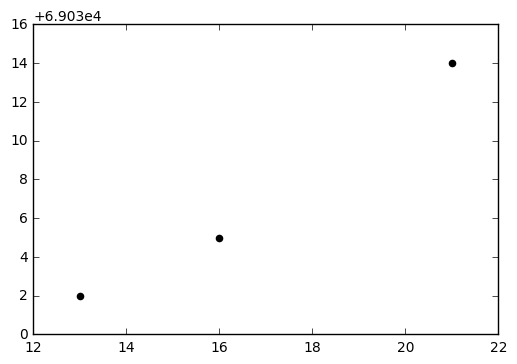

In [137]:
from sklearn.linear_model import LinearRegression
y = [69032, 69035, 69044]
X = [13, 16, 21]

from sklearn.linear_model import LinearRegression
import numpy as np

trainingData = np.array([ [13], [16], [21] ])
trainingScores = np.array([69032,69035,69044])

clf = LinearRegression(fit_intercept=True)
clf.fit(trainingData,trainingScores)

predictionData = np.array([ [24 + 7] ])
clf.predict(predictionData)

regr = linear_model.LinearRegression()
regr.fit(trainingData,trainingScores)
plt.scatter(X, y,  color='black')
plt.plot(X, regr.predict(X), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
    
